In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
banknote=pd.read_csv('BankNoteAuthentication.csv')

In [5]:
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
banknote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


C:\Users\nxy114\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


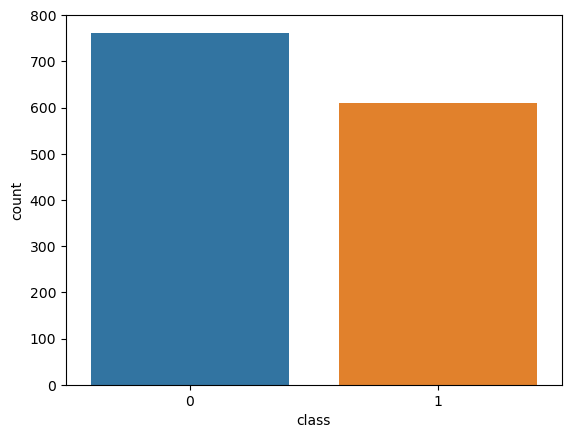

In [9]:
sns.countplot(banknote['class'])
plt.show()

In [20]:
corr_matrix=banknote.corr()


In [26]:

mask=np.triu(np.ones_like(corr_matrix, dtype=bool))

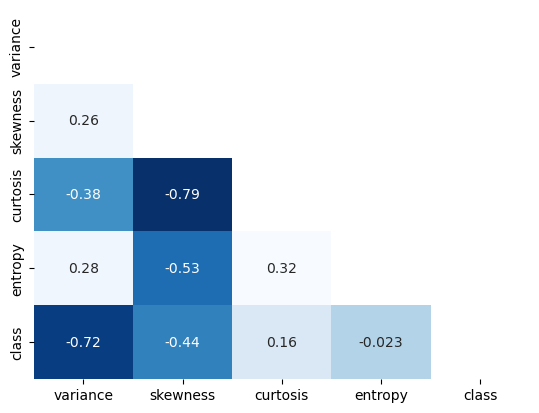

In [27]:
sns.heatmap(corr_matrix, annot=True, cbar=False, cmap='Blues_r', mask=mask)
plt.show()

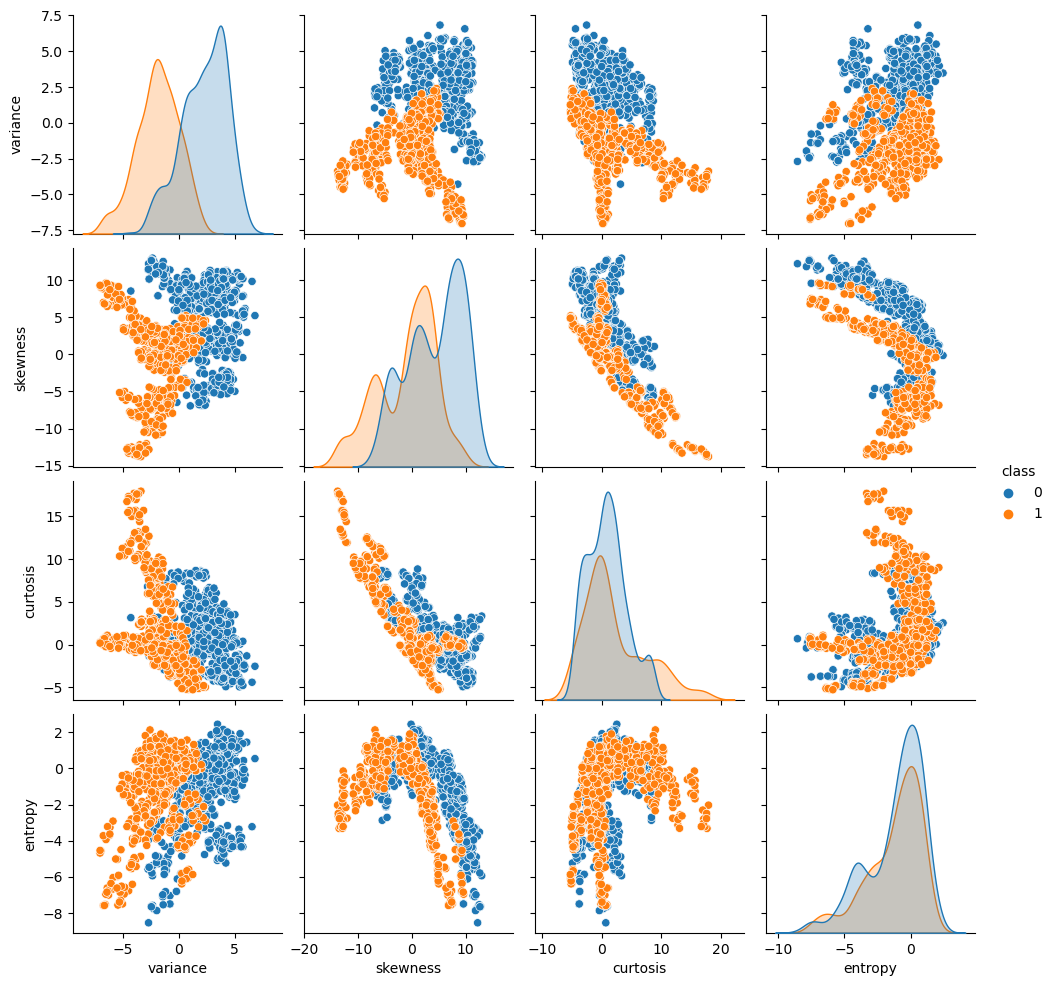

In [30]:
sns.pairplot(banknote, hue='class')

In [33]:
X=banknote.drop(columns='class')
y=banknote['class']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=1984)

In [38]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9963636363636363

In [39]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

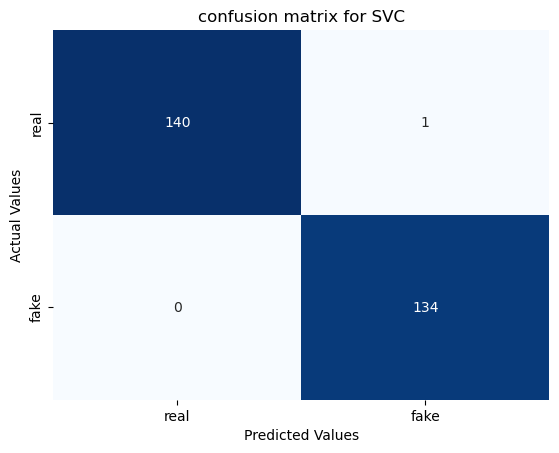

In [48]:
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title("confusion matrix for SVC")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.xticks(np.arange(2)+0.5, ["real", "fake"])
plt.yticks(np.arange(2)+0.5, ["real", "fake"])

plt.show